# Load Dependencies

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Chem import rdMolDescriptors
from rdkit.Avalon import pyAvalonTools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
RandomForest_opt =  RandomForestRegressor()

In [2]:
class FingerprintGenerator():

    def __init__(self):
        print("FingerprintGenerator geladen")

    def generateArrofFingerprints(self, data, lengthPerFP):
        if data == 'nan':
            return self.__generateFingerprints_ALL('NA',lengthPerFP)
        return self.__generateFingerprints_ALL(data,lengthPerFP)

    def __generateFingerprints_ALL(self, data, lengthPerFP):
             
        length = lengthPerFP
        fp_dict = {}
        ret_arr = []

        fp_dict['0'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 2, length))
        fp_dict['1'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 4, length))
        fp_dict['2'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 6, length))
        fp_dict['3'] = self.__generate_boolArray(self.__generateFingerprints_RDKit(data, 8, length))

        fp_dict['4'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 2, length))
        fp_dict['5'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 4, length))
        fp_dict['6'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 6, length))
        fp_dict['7'] = self.__generate_boolArray(self.__generateFingerprints_RDKitlinear(data, 8, length))

        fp_dict['8'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 0, length))
        fp_dict['9'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 2, length))
        fp_dict['10'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 4, length))
        fp_dict['11'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular(data, 6, length))

        fp_dict['12'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 0, length))
        fp_dict['13'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 2, length))
        fp_dict['14'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 4, length))
        fp_dict['15'] = self.__generate_boolArray(self.__generateFingerprints_Morgan_Circular_Feature(data, 6, length))

        fp_dict['16'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 2, length))
        fp_dict['17'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 4, length))
        fp_dict['18'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 6, length))
        fp_dict['19'] = self.__generate_boolArray(self.__generateFingerprints_LayerdFingerprint(data, 8, length))
        
        fp_dict['20'] = self.__generate_boolArray(self.__generateFingerprints_Avalon(data, length))       
        fp_dict['21'] = self.__generate_boolArray(self.__generateFingerprints_Atom_Pairs(data, length))
        fp_dict['22'] = self.__generate_boolArray(self.__generateFingerprints_Topological_Torsions(data, length))
        fp_dict['23'] = self.__generate_boolArray(self.__generateFingerprints_MACCS_keys(data))
        #for item in fp_dict:
        #    ret_arr.extend(fp_dict[item])

        return fp_dict

    def __generate_boolArray(self, fp: ExplicitBitVect) -> []:
        string = fp.ToBitString()
        boolarr = []
        for c in string:
            if c == '1':
                boolarr.append(1) #True
            else:
                boolarr.append(-1) #False

        return boolarr

    def __getEmptyBitVector(self, length):
        bitvector = ExplicitBitVect(length)
        return bitvector

    def __generateFingerprints_RDKit(self, data, maxPath, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        fp = Chem.RDKFingerprint(mol=data, maxPath=maxPath, fpSize=length)
        return fp

    def __generateFingerprints_RDKitlinear(self, data, maxPath, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        fp = Chem.RDKFingerprint(mol=data, maxPath=maxPath, branchedPaths=False, fpSize=length)
        return fp

    def __generateFingerprints_Atom_Pairs(self, data, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(data, nBits=length)

    def __generateFingerprints_Topological_Torsions(self, data, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(data, nBits=length)

    def __generateFingerprints_MACCS_keys(self, data):
        if data == 'NA':
            return self.__getEmptyBitVector(167)
        return MACCSkeys.GenMACCSKeys(data)

    def __generateFingerprints_Morgan_Circular(self, data, r, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return AllChem.GetMorganFingerprintAsBitVect(data, r, nBits=length)

    def __generateFingerprints_Morgan_Circular_Feature(self, data, r, length):
        if data == 'NA':
            return self.__getEmptyBitVector(length)
        return AllChem.GetMorganFingerprintAsBitVect(data, r, useFeatures=True, nBits=length)

    def __generateFingerprints_Avalon(self, data, bitlength):
        if data == 'NA':
            return self.__getEmptyBitVector(bitlength)
        return pyAvalonTools.GetAvalonFP(data, nBits=bitlength)

    def __generateFingerprints_LayerdFingerprint(self, data, r, bitlength):
        if data == 'NA':
            return self.__getEmptyBitVector(bitlength)
        return Chem.LayeredFingerprint(data, maxPath=r, fpSize=bitlength)

# Generate Descriptor

In [3]:
fin_size=2560
def get_all_dict(smi_set):
    all_fin=[]
    all_dict={}
    fin=FingerprintGenerator()
    for tmp_smi in smi_set:
        tmp_mol = AllChem.AddHs(Chem.MolFromSmiles(tmp_smi))
        AllChem.EmbedMolecule(tmp_mol)
        AllChem.MMFFOptimizeMolecule(tmp_mol)
        fp_dict=fin.generateArrofFingerprints(tmp_mol, lengthPerFP=fin_size)
        all_dict[tmp_smi] = fp_dict
        all_fin.append(fp_dict)
    all_fin=np.array(all_fin)
    return all_fin,all_dict

In [4]:
tmp_df = pd.read_csv('./Data/data1/data1.csv')
lig_smiles = tmp_df['Ligand'].to_list()
add_smiles = tmp_df['Additive'].to_list()
base_smiles = tmp_df['Base'].to_list()
ar_ha_smiles = tmp_df['Aryl halide'].to_list()
labels = np.array(tmp_df['Output'].to_list())
lig_smi_set = list(set(lig_smiles))
add_smi_set = list(set(add_smiles))
base_smi_set = list(set(base_smiles))
ar_ha_smi_set = list(set(ar_ha_smiles))

In [5]:
lig_all,lig_all_dict=get_all_dict(lig_smi_set)
add_all,add_all_dict=get_all_dict(add_smi_set)
base_all,base_all_dict=get_all_dict(base_smi_set)
ar_all,ar_all_dict=get_all_dict(ar_ha_smi_set)

FingerprintGenerator geladen
FingerprintGenerator geladen
FingerprintGenerator geladen
FingerprintGenerator geladen


# Descriptor Selection

In [6]:
np.random.seed(1000)
shuffle = np.array(list(range(3955)))
np.random.shuffle(shuffle)
train_index = shuffle[:2768]
val_index = shuffle[2768:]

In [7]:
for i in range(24):
    total_lig = np.array([[lig_all_dict[tmp_smi][str(i)]] for tmp_smi in lig_smiles]).reshape(3955,-1)
    total_add = np.array([[add_all_dict[tmp_smi][str(i)]] for tmp_smi in add_smiles]).reshape(3955,-1)
    total_base = np.array([[base_all_dict[tmp_smi][str(i)]] for tmp_smi in base_smiles]).reshape(3955,-1)
    total_ar = np.array([[ar_all_dict[tmp_smi][str(i)]] for tmp_smi in ar_ha_smiles]).reshape(3955,-1)
    react_feat = np.concatenate([total_lig,total_add,total_base,total_ar],axis=1)
    model= RandomForest_opt  
    all_r2 = []
    all_pearsr = []
    all_mae = []
    all_rmse= []
    repeat_pred = []
    repeat_test = []
    for j in range(3):           
        train_x,test_x = react_feat[train_index],react_feat[val_index]
        train_y,test_y = labels[train_index],labels[val_index]
        model.fit(train_x,train_y)
        test_pred = model.predict(test_x)
        test_y=test_y
        repeat_pred.append(test_pred)
        repeat_test.append(test_y)
        r2 = r2_score(test_y,test_pred)
        pearsr = pearsonr(test_y,test_pred)
        mae = mean_absolute_error(test_y,test_pred)
        rmse=(mean_squared_error(test_y,test_pred))**(0.5)
        all_r2.append(r2)
        all_pearsr.append(pearsr[0])
        all_mae.append(mae)
        all_rmse.append(rmse)   
    print(i,all_r2)

0 [0.7979571312366981]
1 [0.9267001951517393]
2 [0.9284450051482137]
3 [0.9242367993491207]
4 [0.7969674807979735]
5 [0.9194677275007602]
6 [0.9255272736622311]
7 [0.9287681911645719]
8 [0.5246861472446556]
9 [0.924759159753286]
10 [0.926177219470355]
11 [0.9268958444186657]
12 [0.1664478911492201]
13 [0.26481229616076696]
14 [0.263197213371153]
15 [0.2646737177633677]
16 [0.5154696345188814]
17 [0.9093253277909504]
18 [0.9260406907410965]
19 [0.9271059989170854]
20 [0.9292947234963785]
21 [0.9008855793997465]
22 [0.8663190109741694]
23 [0.7158170242649646]


In [6]:
total_lig = np.array([[lig_all_dict[tmp_smi]['21']] for tmp_smi in lig_smiles]).reshape(3955,-1)
total_add = np.array([[add_all_dict[tmp_smi]['21']] for tmp_smi in add_smiles]).reshape(3955,-1)
total_base = np.array([[base_all_dict[tmp_smi]['21']] for tmp_smi in base_smiles]).reshape(3955,-1)
total_ar = np.array([[ar_all_dict[tmp_smi]['21']] for tmp_smi in ar_ha_smiles]).reshape(3955,-1)
react_feat = np.concatenate([total_lig,total_add,total_base,total_ar],axis=1)

# Training Models

## Random Splitting

In [53]:
np.random.seed(1000)
shuffle = np.array(list(range(3955)))
np.random.shuffle(shuffle)
train_index = shuffle[:2768]
val_index = shuffle[2768:]

In [54]:
model= RandomForest_opt  
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

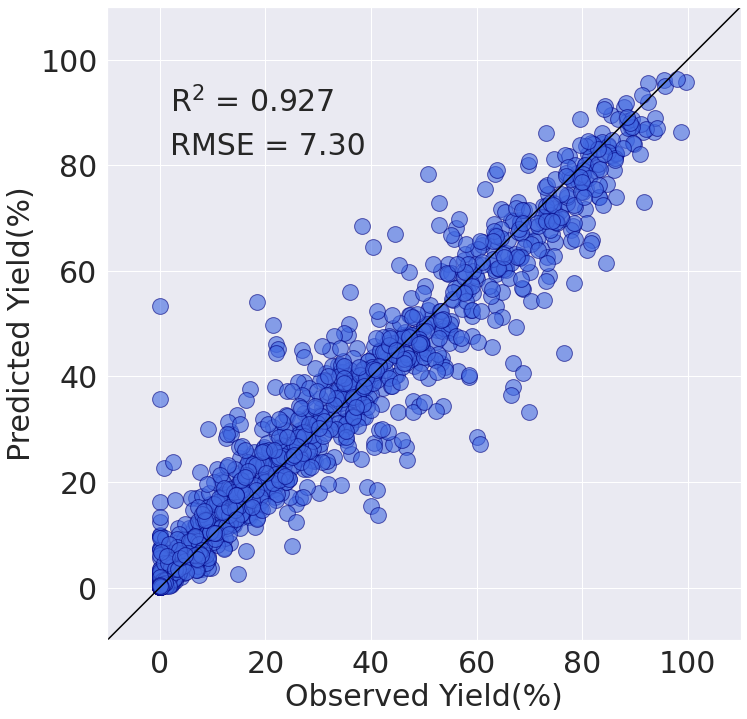

In [57]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',    
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')#royalblue
plt.plot([-20,120],[-20,120],c='black')
plt.xlim(-10,110)
plt.ylim(-10,110)
x_major_locator=MultipleLocator(20)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
#ax.set_facecolor('mistyrose')
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel("Observed Yield(%)",fontsize=30)
plt.ylabel("Predicted Yield(%)",fontsize=30)
plt.tick_params(labelsize=30)
plt.text(2,82,'RMSE = %.2f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(2,90,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()

##  Ligand Splitting

In [27]:
train_cat = ['CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[C@@H]4C5)C[C@H](C4)C[C@H]5C3)[C@]6(C7)C[C@@H](C[C@@H]7C8)C[C@@H]8C6)C(OC)=CC=C2OC',
 'CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)C(C)(C)C)C(OC)=CC=C2OC']
test_cat = ['CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)C(C)(C)C)C=CC=C2',
            'CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)C4CCCCC4)C=CC=C2']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(lig_smiles):
    if tmp_smi in train_cat:
        train_index.append(tmp_idx)
    elif tmp_smi in test_cat:
        val_index.append(tmp_idx)

In [28]:
model= RandomForest_opt  
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

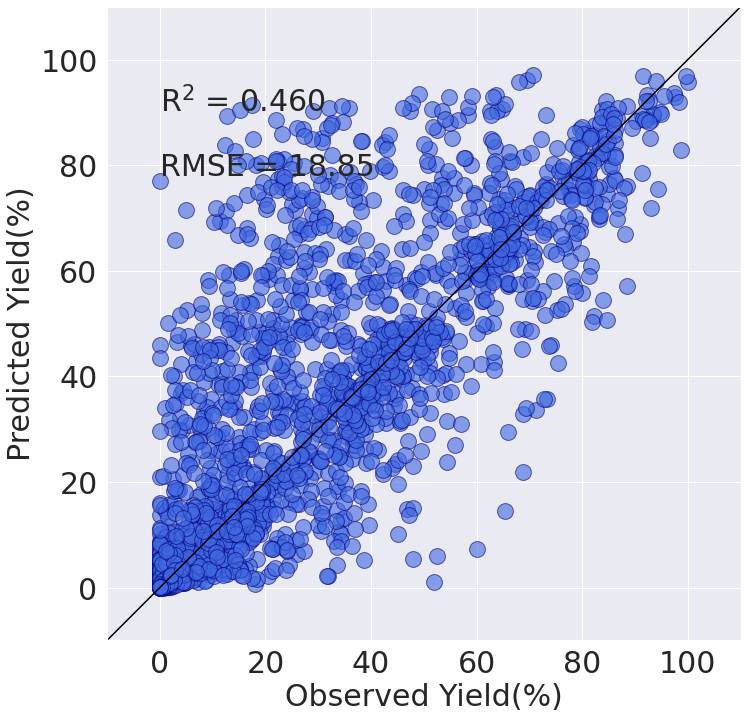

In [60]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',    
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')#royalblue
plt.plot([-20,120],[-20,120],c='black')
plt.xlim(-10,110)
plt.ylim(-10,110)
x_major_locator=MultipleLocator(20)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
#ax.set_facecolor('mistyrose')
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel("Observed Yield(%)",fontsize=30)
plt.ylabel("Predicted Yield(%)",fontsize=30)
plt.tick_params(labelsize=30)
plt.text(0,78,'RMSE = %.2f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(0,90,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()

## Aryl Halide Splitting

In [30]:
train_ar_ha = ['IC1=CC=C(C(F)(F)F)C=C1', 'BrC1=CC=C(OC)C=C1', 
             'BrC1=CC=C(C(F)(F)F)C=C1', 'IC1=CC=C(OC)C=C1', 'ClC1=CC=C(CC)C=C1', 'ClC1=CC=C(C(F)(F)F)C=C1', 'BrC1=CC=C(CC)C=C1', 
             'IC1=CC=C(CC)C=C1', 'ClC1=CC=C(OC)C=C1']
test_ar_ha = ['BrC1=CN=CC=C1', 'BrC1=NC=CC=C1', 'IC1=NC=CC=C1', 'IC1=CN=CC=C1', 'ClC1=CN=CC=C1', 'ClC1=NC=CC=C1']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(ar_ha_smiles):
    if tmp_smi in train_ar_ha:
        train_index.append(tmp_idx)
    elif tmp_smi in test_ar_ha:
        val_index.append(tmp_idx)

In [31]:
model= RandomForest_opt
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

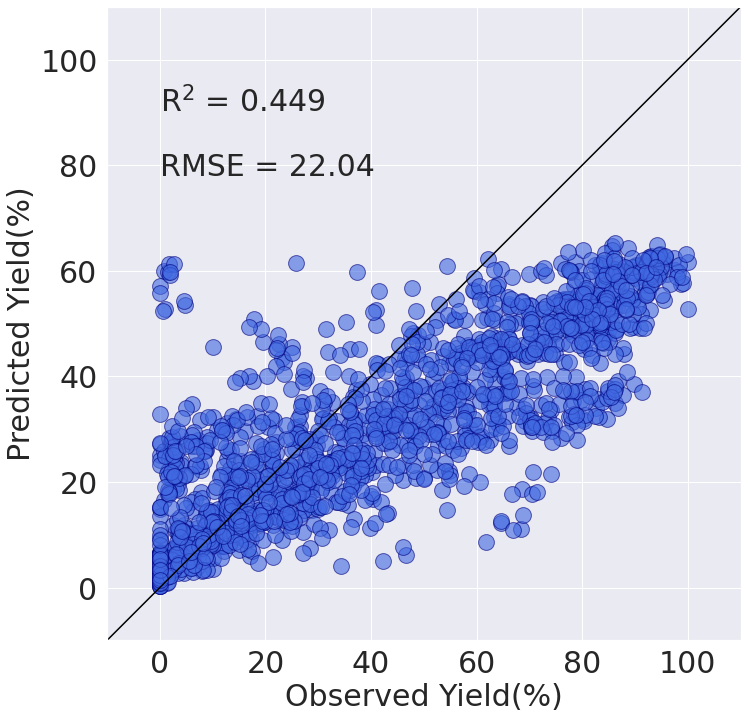

In [65]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',    
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')#royalblue
plt.plot([-20,120],[-20,120],c='black')
plt.xlim(-10,110)
plt.ylim(-10,110)
x_major_locator=MultipleLocator(20)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
#ax.set_facecolor('mistyrose')
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel("Observed Yield(%)",fontsize=30)
plt.ylabel("Predicted Yield(%)",fontsize=30)
plt.tick_params(labelsize=30)
plt.text(0,78,'RMSE = %.2f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(0,90,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()

## Additive Splitting

In [33]:
train_add = ['CCOC(C1=NOC=C1)=O', 'C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=CC=NO1', 'C1(C2=CC=CC=C2)=CC=NO1', 'C1(C2=CC=CC=C2)=NOC=C1',
                'FC(C=CC=C1F)=C1C2=CC=NO2', 'CCOC(C1=CON=C1)=O', 
                'O=C(OC)C1=CC=NO1', 'CC1=NOC=C1', 'CC1=CC=NO1',
                'C1(C2=CC=CC=C2)=CON=C1',
                'C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=NOC=C1']
test_add = ['O=C(OC)C1=NOC(C2=CC=CS2)=C1','CC1=NOC(C(OCC)=O)=C1',
            'COC1=NOC(C(OCC)=O)=C1', 'CC1=CC(N2C=CC=C2)=NO1',
            'O=C(OC)C1=NOC(C2=CC=CO2)=C1',
              'C12=CON=C1C=CC=C2','C12=C(C=CC=C2)ON=C1', 'CC1=CC(C)=NO1',
            'CC1=C(C(OCC)=O)C=NO1', 'CC1=NOC(C2=CC=CC=C2)=C1','CC1=CC(C(OCC)=O)=NO1']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(add_smiles):
    if tmp_smi in train_add:
        train_index.append(tmp_idx)
    elif tmp_smi in test_add:
        val_index.append(tmp_idx)

In [34]:
model= RandomForest_opt      
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

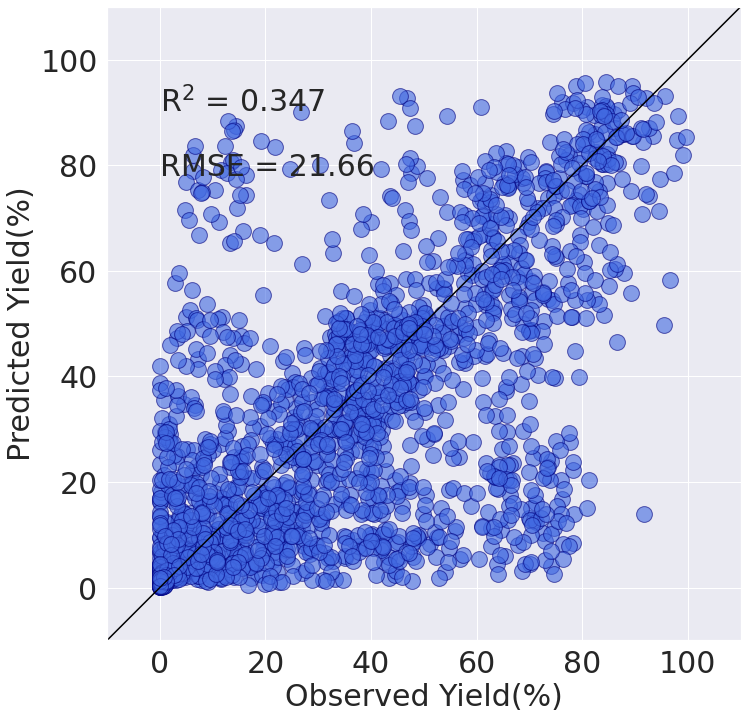

In [68]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',    
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')#royalblue
plt.plot([-20,120],[-20,120],c='black')
plt.xlim(-10,110)
plt.ylim(-10,110)
x_major_locator=MultipleLocator(20)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
#ax.set_facecolor('mistyrose')
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel("Observed Yield(%)",fontsize=30)
plt.ylabel("Predicted Yield(%)",fontsize=30)
plt.tick_params(labelsize=30)
plt.text(0,78,'RMSE = %.2f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(0,90,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()

## Base Splitting

In [36]:
train_base = ['CN1CCCN2C1=NCCC2',
 'CC(C)(C)/N=C(N(C)C)/N(C)C']
test_base = ['CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(base_smiles):
    if tmp_smi in train_base:
        train_index.append(tmp_idx)
    elif tmp_smi in test_base:
        val_index.append(tmp_idx)

In [37]:
model= RandomForest_opt     
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = react_feat[train_index],react_feat[val_index]
    train_y,test_y = labels[train_index],labels[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

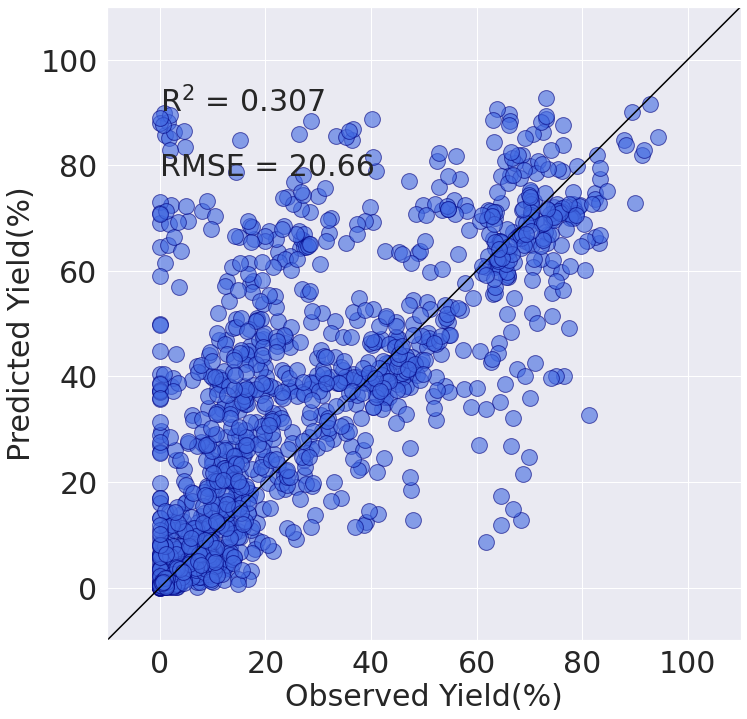

In [71]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',    
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')#royalblue
plt.plot([-20,120],[-20,120],c='black')
plt.xlim(-10,110)
plt.ylim(-10,110)
x_major_locator=MultipleLocator(20)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
#ax.set_facecolor('mistyrose')
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel("Observed Yield(%)",fontsize=30)
plt.ylabel("Predicted Yield(%)",fontsize=30)
plt.tick_params(labelsize=30)
plt.text(0,78,'RMSE = %.2f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(0,90,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()